In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('P1-customers.csv')

In [3]:
df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


In [4]:
df['State'].unique()

array(['CO'], dtype=object)

In [5]:
df['Customer_Segment'].unique()

array(['Store Mailing List', 'Loyalty Club and Credit Card',
       'Loyalty Club Only', 'Credit Card Only'], dtype=object)

In [6]:
df['City'].unique()

array(['Denver', 'Greenwood Village', 'Centennial', 'Lakewood', 'Arvada',
       'Broomfield', 'Aurora', 'Englewood', 'Westminster', 'Northglenn',
       'Littleton', 'Parker', 'Superior', 'Thornton', 'Brighton',
       'Golden', 'Wheat Ridge', 'Castle Pines', 'Highlands Ranch',
       'Edgewater', 'Commerce City', 'Boulder', 'Morrison', 'Lafayette',
       'Louisville', 'Henderson', 'Lone Tree'], dtype=object)

In [7]:
x1=df['Avg_Num_Products_Purchased']
y=df['Avg_Sale_Amount']

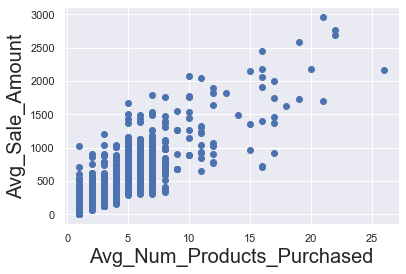

In [8]:
plt.scatter(x1,y)
plt.xlabel('Avg_Num_Products_Purchased',fontsize=20)
plt.ylabel('Avg_Sale_Amount',fontsize=20)
plt.show()

In [9]:
x2=df['#_Years_as_Customer']

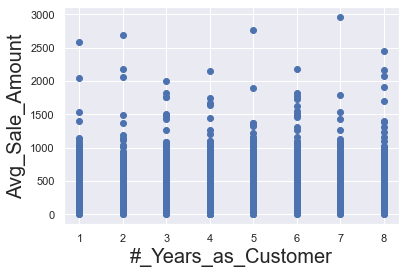

In [10]:
plt.scatter(x2,y)
plt.xlabel('#_Years_as_Customer',fontsize=20)
plt.ylabel('Avg_Sale_Amount',fontsize=20)
plt.show()
#no pattren 

In [11]:
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     6492.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:09:17   Log-Likelihood:                -15649.
No. Observations:                2375   AIC:                         3.130e+04
Df Residuals:                    2373   BIC:                         3.131e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         44.0152      5.704      7.716      0.000      32.829      55.201
Avg_Num_Products_Purchased   106.2802      1.319     80.572      0.000     103.694     108.867
==============================================================================
Omnibus:                      582.044   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3666.856
Skew:                           1.003   Prob(JB):                         0.00
Kurtosis:                       8.747   Cond. No.                         7.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
df_dc=pd.get_dummies(df,columns=['Customer_Segment'],drop_first=True)

In [14]:
df_dc.head()

,Name,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,Pamela Wright,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6,0,0,1
1,Danell Valdez,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6,0,0,1
2,Jessica Rinehart,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3,0,0,1
3,Nancy Clark,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6,0,0,1
4,Andrea Brun,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2,0,0,1


In [15]:
x3=df_dc[['Avg_Num_Products_Purchased','Customer_Segment_Loyalty Club Only','Customer_Segment_Loyalty Club and Credit Card','Customer_Segment_Store Mailing List']]

In [16]:
y=df_dc['Avg_Sale_Amount']

In [17]:
x=sm.add_constant(x3)
result1=sm.OLS(y,x).fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3040.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:09:18   Log-Likelihood:                -15061.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2370   BIC:                         3.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           303.4635     10.576     28.694      0.000     282.725     324.202
Avg_Num_Products_Purchased                       66.9762      1.515     44.208      0.000      64.005      69.947
Customer_Segment_Loyalty Club Only             -149.3557      8.973    -16.645      0.000    -166.951    -131.760
Customer_Segment_Loyalty Club and Credit Card   281.8388     11.910     23.664      0.000     258.484     305.194
Customer_Segment_Store Mailing List            -245.4177      9.768    -25.125      0.000    -264.572    -226.263
==============================================================================
Omnibus:                      359.638   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4770.580
Skew:                           0.232   Prob(JB):                         0.00
Kurtosis:                       9.928   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
data=pd.DataFrame({'const':[303.46],'Avg_Num_Products_Purchased':[3],'Customer_Segment_Loyalty Club Only':[1],'Customer_Segment_Loyalty Club and Credit Card':[0],'Customer_Segment_Store Mailing List':[0]})

In [33]:
result1.predict(data)

0    92140.597898
dtype: float64